<a href="https://colab.research.google.com/github/FelixOgero/Analysis-of-Company-Stocks/blob/main/DiverseStockPortfolioKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Clustering using K-Means

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Load the data
from google.colab import files
files.upload()

Saving NASDAQ.csv to NASDAQ (1).csv


In [5]:
df = pd.read_csv('NASDAQ.csv')
df

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,VOD,VRSK,VRTX,WBA,WDC,WFM,XLNX,YHOO,XRAY,NDX
0,35.9800,96.8000,97.80,61.15,95.4000,58.180,58.000,127.040,26.680,165.8100,...,31.1701,85.440,95.270,81.365,52.1600,33.950,48.61,38.010,62.4800,NaN
1,35.9310,96.8900,97.80,61.61,95.4115,58.190,58.120,126.060,26.730,165.9101,...,31.1900,NaN,94.170,81.540,52.1500,34.100,48.74,38.140,62.8100,4665.0540
2,35.9044,96.9500,97.57,61.98,95.5100,NaN,57.950,126.510,26.712,166.1800,...,31.2100,85.730,94.749,81.530,52.2700,34.010,48.99,38.150,62.6699,4665.8260
3,35.8900,96.9700,97.55,62.09,95.5200,NaN,57.960,126.280,26.740,166.1480,...,31.2100,NaN,94.310,81.710,52.3000,33.960,48.95,38.195,62.5000,4667.0810
4,36.0080,96.9600,97.73,61.89,95.5300,58.230,58.210,126.585,26.720,165.9900,...,31.1800,85.400,94.155,81.720,52.3000,34.170,48.89,38.320,NaN,4664.4910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74496,42.6200,143.7465,133.85,76.15,104.5850,90.110,60.920,127.850,40.660,163.3200,...,26.2000,82.825,118.370,86.530,89.0400,36.355,63.12,48.200,63.2900,5585.7429
74497,42.6300,143.7350,133.84,76.15,104.5900,90.105,60.950,127.950,40.655,163.3450,...,26.2100,82.830,118.425,86.565,89.0300,36.365,63.12,48.205,63.3000,5586.3104
74498,42.6300,143.6865,133.83,76.17,104.5700,90.110,60.940,127.900,40.650,163.3800,...,26.2150,82.820,118.430,86.580,88.9992,36.370,63.13,48.200,63.2700,5585.9941
74499,42.6200,143.7350,133.83,76.16,104.5000,90.130,60.945,127.935,40.645,163.3800,...,26.1950,82.820,118.430,86.580,89.0400,36.365,63.14,48.205,63.2700,5585.6408


In [6]:
# calculate the annual mean returns and variances
daily_returns = df.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

In [9]:
# Create a new dataframe
df2 = pd.DataFrame(df.columns, columns=['Stock_Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values
# Show the data
df2

,Stock_Symbols,Variances,Returns
0,AAL,0.000246,0.000696
1,AAPL,0.000093,0.001381
2,ADBE,0.000098,0.001107
3,ADI,0.000139,0.000813
4,ADP,0.000067,0.000342
...,...,...,...
100,WFM,0.000182,0.000324
101,XLNX,0.000126,0.000946
102,YHOO,0.000104,0.000856
103,XRAY,0.000162,0.000122


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

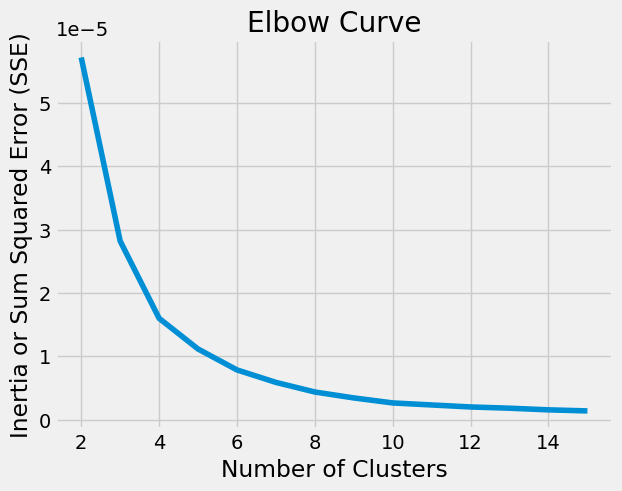

In [11]:
# Use the Elbow method to determine the number of clusters to use to group the stocks
# Get and store the annual returns and annual variances
X = df2[['Returns', 'Variances']].values
inertia_list = []
for k in range(2, 16):
  # Create and train the model
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)


# PLot the data
plt.plot(range(2,16), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum Squared Error (SSE)')
plt.show()

In [12]:
# Get and show the labels / groups
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 2,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 3, 2, 0, 1, 0, 2, 0, 3,
       2, 2, 2, 2, 2, 0, 3, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 2,
       2, 3, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 0, 0, 0], dtype=int32)

In [13]:
df2['Cluster_Labels'] = labels
df2

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,AAL,0.000246,0.000696,0
1,AAPL,0.000093,0.001381,2
2,ADBE,0.000098,0.001107,2
3,ADI,0.000139,0.000813,0
4,ADP,0.000067,0.000342,0
...,...,...,...,...
100,WFM,0.000182,0.000324,0
101,XLNX,0.000126,0.000946,2
102,YHOO,0.000104,0.000856,0
103,XRAY,0.000162,0.000122,0


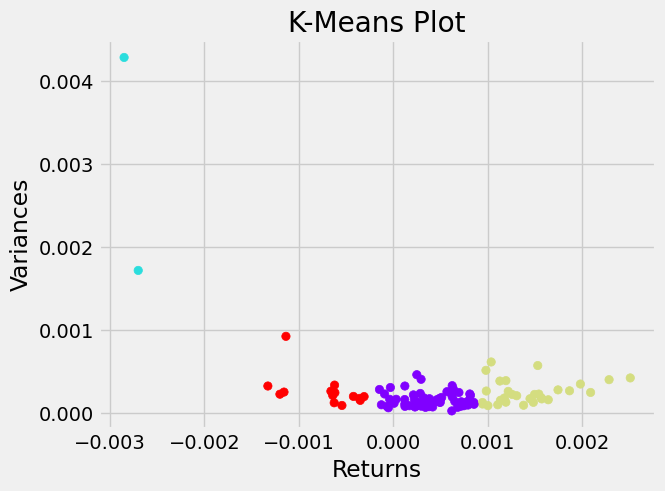

In [14]:
# Plot and show the different clusters
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()

In [15]:
# Create a function to build a simple diverse portfolio
def diverse_port():
  for i in range(0, 4):
    symbol = df2[df2['Cluster_Labels'] == i].head(1)
    print(symbol[['Stock_Symbols', 'Cluster_Labels']])

In [16]:
diverse_port()

  Stock_Symbols  Cluster_Labels
0           AAL               0
   Stock_Symbols  Cluster_Labels
54          LLTC               1
  Stock_Symbols  Cluster_Labels
1          AAPL               2
   Stock_Symbols  Cluster_Labels
13          BBBY               3
